# Public Leader Board Analysis

https://www.kaggle.com/c/titanic/overview

What is the best score possible with Kaggle Titanic data set?

# Initialization

In [9]:
%run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
score ={'gender_only_model':0.76555, 
        'logres': 0.79425, 
        'xgb': 0.78468 }

best_score = score['logres']
best_score

0.79425

# Exploratory Data Analysis

In [13]:
df_raw = (pd.read_csv('../data/external/titanic-publicleaderboard__2019-11-22.csv')
      .sort_values(by='Score')
      .reset_index(drop=True)
     )

df_raw.index = df_raw.index/df_raw.index.max()


df = (pd.concat([df_raw[~df_raw.Score.duplicated()],
                   df_raw[df_raw['TeamName'].str.contains('Kraft')]],
               )
               .sort_index()
                )
#df['Score'] = df['Score'].rolling(window=20).mean().fillna(0)
#df = df.iloc[0::10]
df['dScore'] = df['Score'].diff().fillna(0)
      
df[df['TeamName'].str.contains('Kraft')]

len(df_raw)
len(df)

df_raw[df_raw['Score'] > 0.9]

,TeamId,TeamName,SubmissionDate,Score,dScore
0.639531,3805168,BobKraft,2019-10-18 19:11:07,0.77511,0.0
0.700003,3805168,BobKraft,2019-10-21 19:33:54,0.77990,0.0
0.793689,3805168,BobKraft,2019-10-28 18:44:33,0.78468,0.0
0.905762,3805168,BobKraft,2019-10-28 19:07:52,0.79425,0.0


32578

159

,TeamId,TeamName,SubmissionDate,Score
0.993953,262111,Vitor Alcântara Batista,2016-01-21 12:21:50,0.90430
0.993983,3761275,small tiger,2019-11-15 14:36:56,0.90430
0.994014,3783997,ritesh122,2019-11-22 19:12:39,0.90909
0.994045,3473900,Bill Miao,2019-10-27 23:36:01,0.90909
0.994076,980062,FSBDS Raquel Deneige,2019-10-07 02:01:12,0.90909
...,...,...,...,...
0.999877,3763375,onsmith,2019-10-15 17:34:45,1.00000
0.999908,3951455,"WONG, Wing Kam",2019-11-11 16:11:23,1.00000
0.999939,3797939,chris-wang,2019-10-19 06:11:10,1.00000
0.999969,3762848,gouravraj,2019-10-19 19:07:59,1.00000


### Gender Only

In [21]:
gom = df[df.Score == score['gender_only_model']]
df_kraft = df[df['TeamName'].str.contains('BobKraft')]
df_kraft_best  = df_kraft[df_kraft.Score == df_kraft.Score.max()]

gom
df_kraft
df_kraft_best

,TeamId,TeamName,SubmissionDate,Score,dScore
0.308715,3805501,YoungGyun Lee,2019-10-17 12:02:43,0.76555,0.00479


,TeamId,TeamName,SubmissionDate,Score,dScore
0.639531,3805168,BobKraft,2019-10-18 19:11:07,0.77511,0.0
0.700003,3805168,BobKraft,2019-10-21 19:33:54,0.77990,0.0
0.793689,3805168,BobKraft,2019-10-28 18:44:33,0.78468,0.0
0.905762,3805168,BobKraft,2019-10-28 19:07:52,0.79425,0.0


,TeamId,TeamName,SubmissionDate,Score,dScore
0.905762,3805168,BobKraft,2019-10-28 19:07:52,0.79425,0.0


In [18]:
df[ df['TeamName'].str.contains('Kraft')]

,TeamId,TeamName,SubmissionDate,Score,dScore
0.639531,3805168,BobKraft,2019-10-18 19:11:07,0.77511,0.0
0.700003,3805168,BobKraft,2019-10-21 19:33:54,0.77990,0.0
0.793689,3805168,BobKraft,2019-10-28 18:44:33,0.78468,0.0
0.905762,3805168,BobKraft,2019-10-28 19:07:52,0.79425,0.0


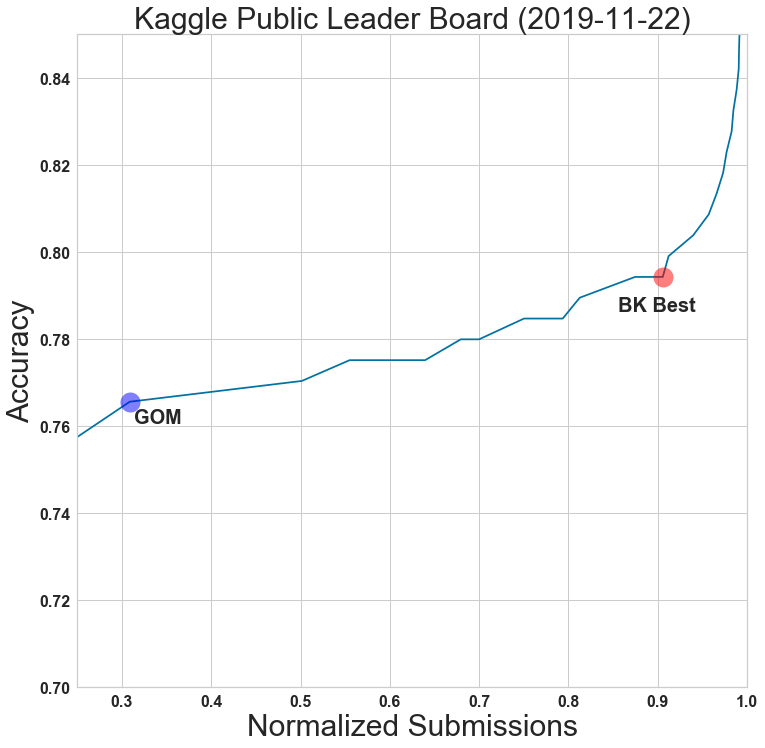

In [52]:
plt.clf()
ax1 = df.Score.plot(figsize=(12,12));
ax1.tick_params(axis="x", labelsize=16);
ax1.tick_params(axis="y", labelsize=16);

plt.xlabel('Normalized Submissions', fontsize=30);
plt.ylabel('Accuracy', fontsize=30);
plt.title('Kaggle Public Leader Board (2019-11-22)', fontsize=30)

df_kraft_best.Score.plot(marker='o', c='red',markersize=20, alpha=0.5);

df[df.Score == score['gender_only_model']].Score.plot(marker='o', c='blue', markersize=20, alpha=0.5);

plt.text(gom.index.values+.005, gom.Score.values-.005, 'GOM', fontsize=20);
plt.text(df_kraft_best.index.values-.05, df_kraft_best.Score.values-.008, 'BK Best', fontsize=20);

plt.axis([0.25,1,0.7,0.85]);
plt.savefig('../docs/_images/public_leader_board.png')
plt.show();

